# Wrangle and Analyze Data

## Introduction

WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. WeRateDogs has over 4 million followers and has received international media coverage. In this project, data wrangling and analyzing will be performed on three datasets, which includes the tweet archive of Twitter user @dog_rates (WeRateDogs), additional WeRateDogs data captured via the Twitter API and image predictions generated from neural network to classify the breed of dogs. And objective is to gather, access, clean and uncover interesting findings in WeRateDog posts through data visualization.  

In [73]:
# import libraries
import pandas as pd
import numpy as np
import requests
import json
import tweepy
import time
import os
import seaborn as sns; sns.set()
from datetime import datetime
from functools import reduce
import matplotlib.pyplot as plt
% matplotlib inline

# 1. Data Gathering

In [2]:
# Load the provided twitter-archive-enhanced csv file  
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
# Load image prediction tsv file from URL by using Request library
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)

with open(url.split('/')[-1], 'wb') as f:
    f.write(r.content)
image_prediction = pd.read_csv('image-predictions.tsv',delimiter='\t')
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [127]:
# Extract tweet_id into a list
tweet_id = twitter_archive['tweet_id'].tolist()

# Initiate API to query tweet ID 
consumer_key = '*'
consumer_secret = '*'
access_token = '*'
access_secret = '*'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)


api = tweepy.API(auth_handler = auth, parser = tweepy.parsers.JSONParser())

In [5]:
# Sucessfully ownloaded tweet data based on Tweet ID and store in a list
# Unsucessful tweet data will also be stored in a list and print out
tweet_data = []
tweet_data_success = []
tweet_data_fail = []
for item in tweet_id:
    try:
        start = time.time()
        tweet = api.get_status(item, tweet_mode='extended', wait_on_rate_limit = True, 
                               wait_on_rate_limit_notify = True)
        end = time.time()
        # Calculate the time of excution
        total = end - start
        tweet_data.append(tweet)
        tweet_data_success.append(item)
        print("ID: " + str(item) + "; Time: "+ str(total))
    except:
        tweet_data_fail.append(item)
        print("Error: " + str(item))

ID: 892420643555336193; Time: 0.15686392784118652
ID: 892177421306343426; Time: 0.20763587951660156
ID: 891815181378084864; Time: 0.1479346752166748
ID: 891689557279858688; Time: 0.17924237251281738
ID: 891327558926688256; Time: 0.15145111083984375
ID: 891087950875897856; Time: 0.15716242790222168
ID: 890971913173991426; Time: 0.15382623672485352
ID: 890729181411237888; Time: 0.17801284790039062
ID: 890609185150312448; Time: 0.18603920936584473
ID: 890240255349198849; Time: 0.17213773727416992
ID: 890006608113172480; Time: 0.20548629760742188
ID: 889880896479866881; Time: 0.18104791641235352
ID: 889665388333682689; Time: 0.14887237548828125
ID: 889638837579907072; Time: 0.15430521965026855
ID: 889531135344209921; Time: 0.18425965309143066
ID: 889278841981685760; Time: 0.17823076248168945
ID: 888917238123831296; Time: 0.1564028263092041
ID: 888804989199671297; Time: 0.2131035327911377
ID: 888554962724278272; Time: 0.15581655502319336
Error: 888202515573088257
ID: 888078434458587136; Tim

In [6]:
# Write tweet data to json file
with open('tweet_json.txt', mode = 'w') as f:
    json.dump(tweet_data, f)

# Load the Twitter API data
tweet_json = pd.read_json('tweet_json.txt')
tweet_json['tweet_id'] = tweet_data_success
tweet_json = tweet_json[['tweet_id', 'favorite_count', 'retweet_count']]
tweet_json.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,35719,7550
1,892177421306343426,30864,5596
2,891815181378084864,23211,3705
3,891689557279858688,39011,7730
4,891327558926688256,37261,8333


In [7]:
# Store the dataFrame in file
tweet_json.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

# 2. Data Assessing

In [9]:
# Extract samples to view the overall structure of twitter_archive
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1210,715680795826982913,NaN,NaN,2016-03-31 23:22:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zeus. He's downright fabulous. 12/10 h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715680795...,12,10,Zeus,None,None,None,None
1587,686749460672679938,NaN,NaN,2016-01-12 03:20:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Strange pup here. Easily manipulated. Rather i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686749460...,8,10,None,None,None,None,None
2063,671159727754231808,NaN,NaN,2015-11-30 02:52:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Anthony. He just finished up his maste...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671159727...,5,10,Anthony,None,None,None,None
394,825829644528148480,NaN,NaN,2017-01-29 22:15:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Toby. He just found out you only prete...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825829644...,12,10,Toby,None,None,None,None
1493,692752401762250755,NaN,NaN,2016-01-28 16:53:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Hello yes could I get one pupper to go please...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/692752401...,13,10,None,None,None,pupper,None


In [10]:
# Check the datatype, missing values and total entries 
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
# Find the missing values in retweet_status_id
twitter_archive['retweeted_status_id'].isnull()

0        True
1        True
2        True
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10       True
11       True
12       True
13       True
14       True
15       True
16       True
17       True
18       True
19      False
20       True
21       True
22       True
23       True
24       True
25       True
26       True
27       True
28       True
29       True
        ...  
2326     True
2327     True
2328     True
2329     True
2330     True
2331     True
2332     True
2333     True
2334     True
2335     True
2336     True
2337     True
2338     True
2339     True
2340     True
2341     True
2342     True
2343     True
2344     True
2345     True
2346     True
2347     True
2348     True
2349     True
2350     True
2351     True
2352     True
2353     True
2354     True
2355     True
Name: retweeted_status_id, Length: 2356, dtype: bool

In [12]:
# Check how many types of rating numerator values in twitter_archive
twitter_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [13]:
# Noticed a large numerator 1776 and find out which data entry it is in data frame
twitter_archive[twitter_archive['rating_numerator'] == 1776]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


In [14]:
# # Check how many types of rating denominator values in twitter_archive
twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [15]:
# Take a look at the first 5 entries of image_prediction
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [16]:
# Check the datatype, missing values and total entries 
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
# Check the datatype, missing values and total entries 
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null int64
favorite_count    2331 non-null int64
retweet_count     2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


In [19]:
# Check missing values in favorite_count
tweet_json.favorite_count.isnull().sum()

0

In [20]:
# Check missing values in retweet_count
tweet_json.retweet_count.isnull().sum()

0

In [21]:
# Check duplicated values in tweet_json
tweet_json.duplicated().sum()

0


## Quality Issues 

### Twitter_archive

-  Retweets data were found in dataframe (retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp)
-  Drop columns irrelavent to this analysis (in_reply_to_status_id, in_reply_to_user_id and expanded_urls etc.)
-  Erroneous timestamp datatype
-  Erroneous name extracted from text ('None', 'a', 'the', 'an', 'this', 'such', 'quite', 'not', 'one', 'incredibly', 'mad', 'very', 'just', 'my')
-  Erroneous numerators and denominators values (decimal, 2 date entry etc.)
-  name, doggo, floofer, pupper and puppo have value None instead of NaN
-  Update datatype for dog_stage to category

### Image_prediction

-  Missing records (2075 instead of 2356) 
-  Dog breed name contains underscore; mixed uppercase and lowercase

### Tweet_json

-  Missing records (2331 instead of 2356)
-  Favorite_count and retweet_count are float


## Tidiness Issues

### Twitter_archive

-  Dog stage (doggo, floofer, pupper and puppo) in 4 different columns

### Image_prediction

- Best prediction should be selected from 3 predictions
- Merge this dataframe with twitter_achive to form 1 master dataframe

### Tweet_json

- Merge this dataframe with twitter_achive to form 1 master dataframe

# 3. Data Cleaning 

In [22]:
# Adjust the display option to make data frame easier to read
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Save a copy for data cleaning 
twitter_archive_clean = twitter_archive.copy()
image_prediction_clean = image_prediction.copy()
tweet_json_clean = tweet_json.copy()

**Twitter_archive：** Retweets data were found in dataframe (retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp

**Define:**  Delete retweets rows by finding the NaN of retweeted_status_id

**Code**

In [23]:
# There are 181 retweeted data in twitter_archive_clean df
twitter_archive_clean['retweeted_status_id'].value_counts().sum()

181

In [24]:
# Remove reweeted data if reweeted_status_id is not NaN
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isnull()]

**Test**

In [25]:
# Reweeted_status_id has been cleaned from dataframe
twitter_archive_clean['retweeted_status_id'].value_counts().sum()

0

In [26]:
# Reweeted_status_user_id has been cleaned from dataframe
twitter_archive_clean['retweeted_status_user_id'].value_counts().sum()

0

In [27]:
# Reweeted_status_timestamp has been cleaned from dataframe
twitter_archive_clean['retweeted_status_timestamp'].value_counts().sum()

0

**Twitter_archive：**Drop columns irrelavent to this analysis

**Define:**  Remove columns from dataframe, in_reply_to_status_id, in_reply_to_user_id, source, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls

**Code**

In [28]:
# Drop irrelavent columns from dataframe
twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'source',
                           'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp',
                           'expanded_urls'], axis = 1, inplace = True) 

**Test**

In [29]:
# Check if the columns has been dropped
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(7)
memory usage: 186.9+ KB


**Twitter_archive：** Name, doggo, floofer, pupper and puppo have value as None instead of NaN

**Define：** Replace all None values with NaN instead 

**Code**

In [30]:
# Replace None exist in dataframe with NaN
twitter_archive_clean.replace(to_replace=['None'], value=np.nan, inplace=True)

**Test**

In [31]:
# Sample to check if None is replaced by NaN
twitter_archive_clean.sample(5)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2330,666362758909284353,2015-11-16 21:10:36 +0000,Unique dog here. Very small. Lives in containe...,6,10,NaN,NaN,NaN,NaN,NaN
1391,700143752053182464,2016-02-18 02:24:13 +0000,When it's Janet from accounting's birthday but...,10,10,NaN,NaN,NaN,pupper,NaN
1943,673709992831262724,2015-12-07 03:45:53 +0000,I know a lot of you are studying for finals. G...,12,10,NaN,NaN,NaN,NaN,NaN
644,793180763617361921,2016-10-31 20:00:05 +0000,This is Newt. He's a strawberry. 11/10 https:/...,11,10,Newt,NaN,NaN,NaN,NaN
1456,695314793360662529,2016-02-04 18:35:39 +0000,This is Colin. He really likes green beans. It...,10,10,Colin,NaN,NaN,NaN,NaN


**Tidiness Issue**

**Image_prection:** Best prediction should be selected from 3 predictions

**Define:** Find the best True prediction with highest confidence level and consolidate the result in one column named dog_breed

**Code**

In [32]:
# Use loop to row by row find the best confidence level of True prediction for dog breed
image_prediction_clean['dog_breed'] = 'NaN'

for i, row in image_prediction_clean.iterrows():
    if row.p1_dog:
        image_prediction_clean.set_value(i, 'dog_breed', row.p1)
    elif row.p2_dog: 
        image_prediction_clean.set_value(i, 'dog_breed', row.p2)
    elif row.p3_dog: 
        image_prediction_clean.set_value(i, 'dog_breed', row.p3)
    else:
        image_prediction_clean.set_value(i, 'dog_breed', 'NaN')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [33]:
# Remove irrelavent columns and only kept the best prediction 
image_prediction_clean.drop(['p1', 'p1_conf', 'p1_dog','p2', 'p2_conf', 'p2_dog',
                             'p3', 'p3_conf', 'p3_dog', 'img_num'], axis = 1, inplace = True) 

**Test**

In [34]:
# Check if dog breed is in the data frame
image_prediction_clean.head()

,tweet_id,jpg_url,dog_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher


**Image_prediction_clean:** breed contains underscore; mixed uppercase and lowercase

**Define:** Remove underscore between str and replace with whitespace, change all dog breed to lowercase

**Code**

In [35]:
# Replace dog_breed data with all lowercase and removed underscore in str
image_prediction_clean['dog_breed'] = image_prediction_clean['dog_breed'].str.lower().str.replace("_"," ")


**Test**

In [36]:
# Collect 3 samples to confirm all dog breed is changed to lowercase and removed underscore 
image_prediction_clean.sample(3)

,tweet_id,jpg_url,dog_breed
726,686358356425093120,https://pbs.twimg.com/media/CYZvRttWYAE_RXc.jpg,pug
1032,711652651650457602,https://pbs.twimg.com/media/CeBMT6-WIAA7Qqf.jpg,nan
1228,745422732645535745,https://pbs.twimg.com/media/ClhGBCAWIAAFCsz.jpg,labrador retriever


**Twitter_archive：**Erroneous timestamp datatype

**Define:** Correct datetype for timestamp column from str to datetime

**Code**  

In [37]:
# Change datatype of timestamp to datetime and remove time data
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp']).dt.normalize()

**Test**  

In [38]:
# Check datatype for timestamp is updated correctly
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  1495 non-null object
doggo                 87 non-null object
floofer               10 non-null object
pupper                234 non-null object
puppo                 25 non-null object
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 186.9+ KB


In [39]:
# Check if the time is dropped from timestamp
twitter_archive_clean.sample(3)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
894,759197388317847553,2016-07-30,This is Luna. She's just heckin precious af I ...,12,10,Luna,NaN,NaN,NaN,NaN
1313,706904523814649856,2016-03-07,Ever seen a dog pet another dog? Both 13/10 tr...,13,10,NaN,NaN,NaN,NaN,NaN
1530,690021994562220032,2016-01-21,"Say hello to Geoff (pronounced ""Kyle""). He acc...",10,10,Geoff,NaN,NaN,NaN,NaN


**Twitter_archive：**Erroneous dog name extracted from text 

**Define:** Dog name such as 'None', 'a', 'the', 'an', 'this', 'such', 'quite', 'not', 'one', 
              'incredibly', 'mad', 'very', 'just', 'my' will be replaced with NaN instead

**Code**

In [40]:
# Find tweet_id with dog name extracted as incredibly
twitter_archive_clean[twitter_archive_clean['name'] == 'incredibly']

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
542,806219024703037440,2016-12-06,We only rate dogs. Please stop sending in non-...,11,10,incredibly,NaN,NaN,NaN,NaN


In [41]:
# Replace wrong names from the list with NaN
wrong_name = ['None', 'a', 'the', 'an', 'this', 'such', 'quite', 'not', 'one', 
              'incredibly', 'mad', 'very', 'just', 'my']

for i in wrong_name:
    twitter_archive_clean.loc[twitter_archive_clean.name == i, 'name'] = 'NaN'

**Test**

In [42]:
# Check 'incredibly' is replaced with NaN
twitter_archive_clean[twitter_archive_clean['tweet_id'] == 806219024703037440]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
542,806219024703037440,2016-12-06,We only rate dogs. Please stop sending in non-...,11,10,NaN,NaN,NaN,NaN,NaN


**Twitter_archive：**Dog stage (doggo, floofer, pupper and puppo) in 4 different columns

**Define:** Create new column dog_stage by melting doggo, floofer, pupper and puppo columns

**Code** 

In [43]:
# Extract dog stage value from text and update in a new column dog_stage
twitter_archive_clean['dog_stage'] = twitter_archive_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')

# Drop unnecessary columns
twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo' ],axis = 1, inplace = True)

# Change dog_stage datatype to category
twitter_archive_clean['dog_stage'] = twitter_archive_clean['dog_stage'].astype('category')

**Test** 

In [44]:
# Crosscheck with text if the dog_stage is extracted correctly
twitter_archive_clean.sample(5)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage
1682,681891461017812993,2015-12-29,Say hello to Charlie. He's scholarly af. Quite...,10,10,Charlie,pupper
183,856543823941562368,2017-04-24,This is Callie. She'll be your navigator today...,12,10,Callie,NaN
2058,671347597085433856,2015-11-30,This is Lola. She was not fully prepared for t...,9,10,Lola,NaN
676,789314372632018944,2016-10-21,HE WAS JUST A LIL SLEEPY FROM BEING SUCH A GOO...,13,10,NaN,NaN
277,840370681858686976,2017-03-11,You have been visited by the magical sugar jar...,13,10,NaN,NaN


In [45]:
# Check the datatype of dog_stage
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  1495 non-null object
dog_stage             364 non-null category
dtypes: category(1), datetime64[ns](1), int64(3), object(2)
memory usage: 121.3+ KB


**Twitter_archive：**Erroneous numerators and denominators values
- 2 ratings entry
- decimal ratings 
- update an overall rating in the column based on numerators and denominators 

**Code**

In [46]:
# Find text contains 2 ratings in 1 tweet_id
twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage
55,881633300179243008,2017-07-02,@roushfenway These are good dogs but 17/10 is ...,17,10,NaN,NaN
313,835246439529840640,2017-02-24,@jonnysun @Lin_Manuel ok jomny I know you're e...,960,0,NaN,NaN
766,777684233540206592,2016-09-19,"""Yep... just as I suspected. You're not flossi...",12,10,NaN,NaN
1007,747600769478692864,2016-06-28,This is Bookstore and Seaweed. Bookstore is ti...,10,10,Bookstore,NaN
1068,740373189193256964,2016-06-08,"After so many requests, this is Bretagne. She ...",9,11,NaN,NaN
1165,722974582966214656,2016-04-21,Happy 4/20 from the squad! 13/10 for all https...,4,20,NaN,NaN
1202,716439118184652801,2016-04-03,This is Bluebert. He just saw that both #Final...,50,50,Bluebert,NaN
1222,714258258790387713,2016-03-28,Meet Travis and Flurp. Travis is pretty chill ...,10,10,Travis,NaN
1359,703356393781329922,2016-02-26,This is Socks. That water pup w the super legs...,9,10,Socks,NaN
1459,695064344191721472,2016-02-04,This may be the greatest video I've ever been ...,4,10,NaN,NaN


In [47]:
# Check multiple rating score from text and save into a list
multiple_rating = twitter_archive_clean['tweet_id'][twitter_archive_clean.text.str.contains
                                              ( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")].tolist()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


In [48]:
# Replace rating_numerator values with NaN for all tweet_id with multiple ratings
twitter_archive_clean['rating_numerator'] = np.where(twitter_archive_clean['tweet_id'].isin(multiple_rating),
                                                         np.NaN, twitter_archive_clean['rating_numerator'])

twitter_archive_clean['rating_numerator'].isnull().sum()

30

In [49]:
# Allocate all rating_numerator with decimal places from text
twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage
45,883482846933004288,2017-07-08,This is Bella. She hopes her smile made you sm...,5.0,10,Bella,NaN
695,786709082849828864,2016-10-13,"This is Logan, the Chow who lived. He solemnly...",75.0,10,Logan,NaN
763,778027034220126208,2016-09-20,This is Sophie. She's a Jubilant Bush Pupper. ...,27.0,10,Sophie,NaN
1689,681340665377193984,2015-12-28,I've been told there's a slight possibility he...,5.0,10,NaN,NaN
1712,680494726643068929,2015-12-25,Here we have uncovered an entire battalion of ...,26.0,10,NaN,pupper


In [50]:
# Find out the decimal ratings extracted from text
twitter_archive_clean['text'].str.extract( r'(\d+\.\d+)/(\d+)')[0].dropna().tolist()

['13.5', '9.75', '11.27', '9.5', '11.26']

In [51]:
# Manually update the 5 decimal ratings
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 883482846933004288) & (twitter_archive_clean['rating_numerator'] == 5), ['rating_numerator']] = 13.5
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 786709082849828864) & (twitter_archive_clean['rating_numerator'] == 75), ['rating_numerator']] = 9.75
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 778027034220126208) & (twitter_archive_clean['rating_numerator'] == 27), ['rating_numerator']] = 11.27
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 680494726643068929) & (twitter_archive_clean['rating_numerator'] == 26), ['rating_numerator']] = 11.26

**Test**

In [52]:
# Check if the decimal ratings are updated in dataframe
twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage
45,883482846933004288,2017-07-08,This is Bella. She hopes her smile made you sm...,13.50,10,Bella,NaN
695,786709082849828864,2016-10-13,"This is Logan, the Chow who lived. He solemnly...",9.75,10,Logan,NaN
763,778027034220126208,2016-09-20,This is Sophie. She's a Jubilant Bush Pupper. ...,11.27,10,Sophie,NaN
1689,681340665377193984,2015-12-28,I've been told there's a slight possibility he...,5.00,10,NaN,NaN
1712,680494726643068929,2015-12-25,Here we have uncovered an entire battalion of ...,11.26,10,NaN,pupper


In [53]:
# Add a new column to represent overall rating
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['rating_numerator'].astype(float)
twitter_archive_clean['rating_denominator'] = twitter_archive_clean['rating_denominator'].astype(float)
twitter_archive_clean['rating'] = (10 * twitter_archive_clean['rating_numerator']) / twitter_archive_clean['rating_denominator'].astype(float)

# Drop rating_numerator and rating_denominator
twitter_archive_clean.drop(['rating_numerator', 'rating_denominator'], axis = 1, inplace = True)

**Test**

In [54]:
# Collect sample to check if rating column exists
twitter_archive_clean.sample(3)

,tweet_id,timestamp,text,name,dog_stage,rating
1883,674805413498527744,2015-12-10,When your entire life is crumbling before you ...,NaN,NaN,10.0
245,845812042753855489,2017-03-26,We usually don't rate polar bears but this one...,NaN,NaN,13.0
1944,673708611235921920,2015-12-07,This is Riley. She's just an adorable football...,Riley,NaN,12.0


**tweet_json_clean**: Erroneous favorite_count and reweet_count datatype

**Define:** Change favorite_count and reweet_count datatype from float to int

**Code**

In [55]:
# Save favorite_count and reweet_count datatype as int
tweet_json_clean['favorite_count'] = tweet_json_clean['favorite_count'].astype(int)
tweet_json_clean['retweet_count'] = tweet_json_clean['retweet_count'].astype(int)

**Test**

In [56]:
# Check if the datatype is updated correctly
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null int64
favorite_count    2331 non-null int64
retweet_count     2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


**Tidiness Issue**

**Twitter_archive：** Merge this dataframe with image_prediction and tweet_json

**Define:** Merge twtter_archive, image_prediction and tweet_json on tweet_id and remove missing data

**Code**

In [57]:
# Merge 3 seperate dataframes into 1 master dataframe
df = twitter_archive_clean.merge(image_prediction_clean,on='tweet_id').merge(tweet_json_clean,on='tweet_id')
df = df[df['rating'].notnull()]

**Test**

In [58]:
# Check if all columns in individual data frame are properly merged 
df.head()

,tweet_id,timestamp,text,name,dog_stage,rating,jpg_url,dog_breed,favorite_count,retweet_count
0,892420643555336193,2017-08-01,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,13.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,nan,35719,7550
1,892177421306343426,2017-08-01,This is Tilly. She's just checking pup on you....,Tilly,NaN,13.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,chihuahua,30864,5596
2,891815181378084864,2017-07-31,This is Archie. He is a rare Norwegian Pouncin...,Archie,NaN,12.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,chihuahua,23211,3705
3,891689557279858688,2017-07-30,This is Darla. She commenced a snooze mid meal...,Darla,NaN,13.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,labrador retriever,39011,7730
4,891327558926688256,2017-07-29,This is Franklin. He would like you to stop ca...,Franklin,NaN,12.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,37261,8333


In [59]:
# Make sure the number of entries is correct after merging 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1960 entries, 0 to 1986
Data columns (total 10 columns):
tweet_id          1960 non-null int64
timestamp         1960 non-null datetime64[ns]
text              1960 non-null object
name              1425 non-null object
dog_stage         322 non-null category
rating            1960 non-null float64
jpg_url           1960 non-null object
dog_breed         1960 non-null object
favorite_count    1960 non-null int64
retweet_count     1960 non-null int64
dtypes: category(1), datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 155.2+ KB


# 4. Data Storing and Visualization 
three (3) insights and one (1) visualization

In [60]:
# Storing the new twitter_dogs df to a new csv file
df.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

In [61]:
# Read the twitter_archive_master file
df_master = pd.read_csv('twitter_archive_master.csv')
df_master.head(2)

,tweet_id,timestamp,text,name,dog_stage,rating,jpg_url,dog_breed,favorite_count,retweet_count
0,892420643555336193,2017-08-01,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,13.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,35719,7550
1,892177421306343426,2017-08-01,This is Tilly. She's just checking pup on you....,Tilly,NaN,13.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,chihuahua,30864,5596


### 4.1. What is the average rating? Which dog breed has highest rating in WeRateDogs?

In [62]:
# Find the mean of rating
df_master['rating'].describe()

count    1960.000000
mean       11.688299
std        40.991537
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating, dtype: float64

**Insight 1** Average rating is 11.69 

In [77]:
# Sort the dog breed by rating
df_master.groupby(['dog_breed']).mean().rating.sort_values(ascending=False)

dog_breed
australian terrier                13.000000
bouvier des flandres              13.000000
saluki                            12.500000
briard                            12.333333
tibetan mastiff                   12.250000
border terrier                    12.142857
standard schnauzer                12.000000
silky terrier                     12.000000
golden retriever                  11.767857
gordon setter                     11.750000
irish setter                      11.750000
samoyed                           11.731707
flat-coated retriever             11.714286
giant schnauzer                   11.500000
wire-haired fox terrier           11.500000
great pyrenees                    11.466667
norfolk terrier                   11.428571
pembroke                          11.425532
chow                              11.416667
eskimo dog                        11.409091
doberman                          11.333333
irish water spaniel               11.333333
greater swiss mountain

**Insight 1:** Australian terrier and bouvier des terrier have the highest rating score in WeRateDog with 13/10; followed by saluki, 12.5/10; and briard, 12.33/10.

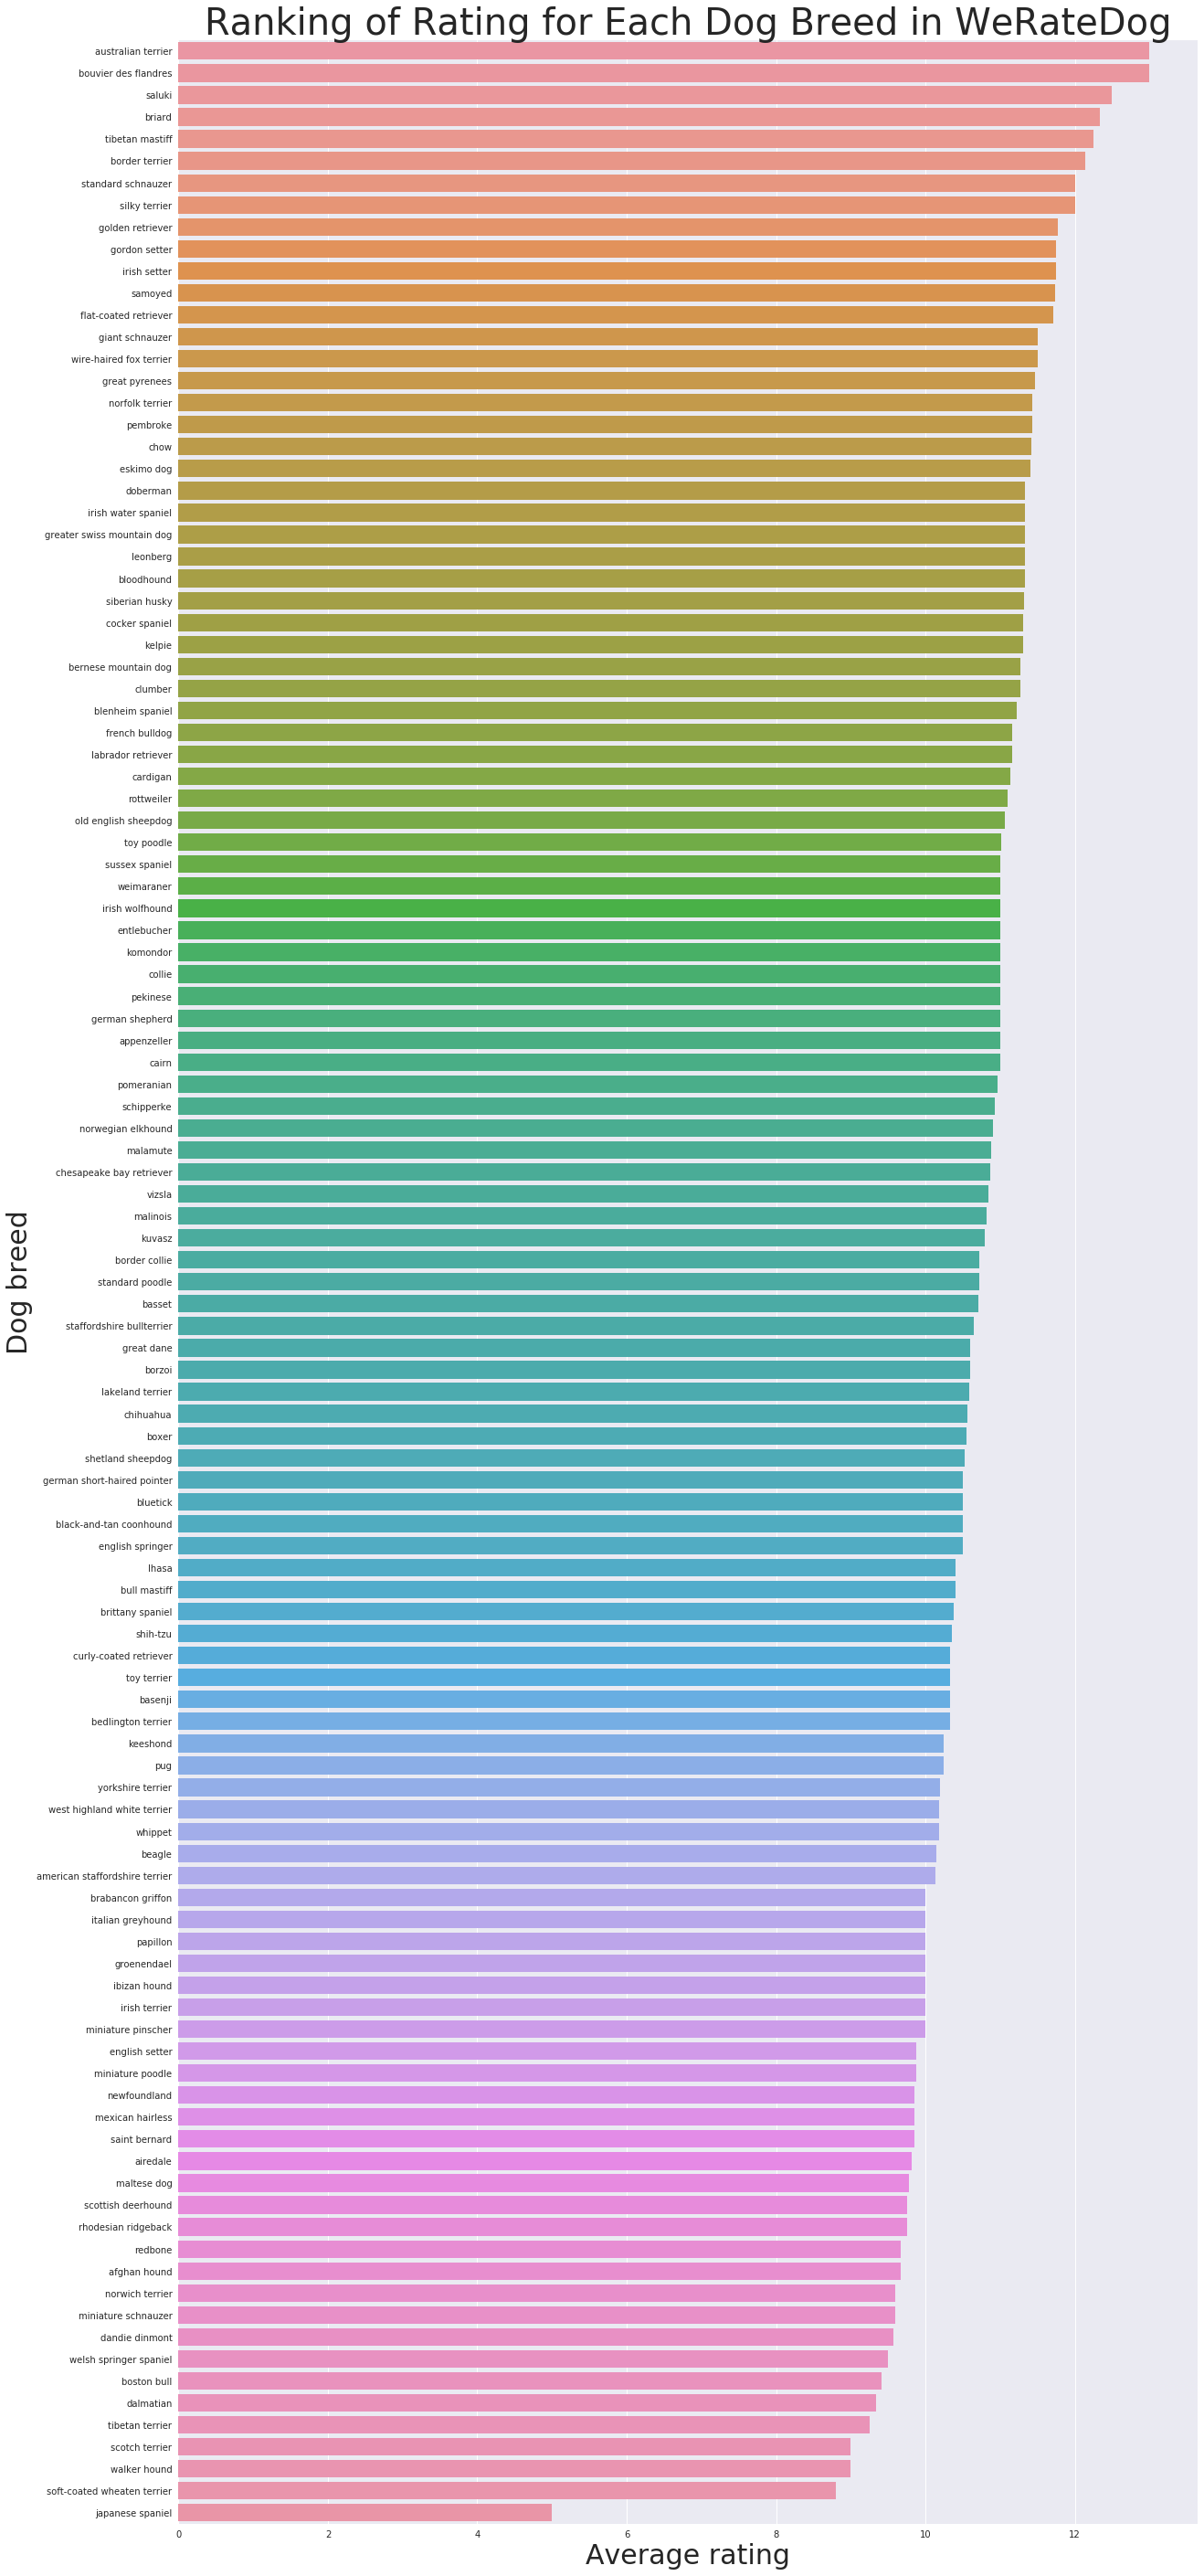

In [115]:
plt.subplots(figsize=(20,50))

# make barplot in descending order
sns.barplot(y=df_master.groupby(['dog_breed']).mean().rating.sort_values(ascending=False).index, 
            x=df_master.groupby(['dog_breed']).mean().rating.sort_values(ascending=False))

# Set labels
sns.set(font_scale=1) 
plt.legend(loc='upper left', bbox_to_anchor=(0, 1))
plt.xlabel("Average rating", size=30)
plt.ylabel("Dog breed", size=30)
plt.title("Ranking of Rating for Each Dog Breed in WeRateDog", size=40);

### 4.2. Which dog breed is frequently posted in WeRateDogs

In [83]:
# List down dog breed count in descending order
df_master['dog_breed'].value_counts()

golden retriever                  156
labrador retriever                105
pembroke                           94
chihuahua                          88
pug                                62
toy poodle                         50
chow                               48
samoyed                            41
pomeranian                         40
malamute                           33
french bulldog                     30
cocker spaniel                     29
chesapeake bay retriever           29
miniature pinscher                 25
eskimo dog                         22
cardigan                           21
german shepherd                    21
shih-tzu                           20
staffordshire bullterrier          20
beagle                             20
rottweiler                         19
shetland sheepdog                  19
siberian husky                     19
kuvasz                             18
maltese dog                        18
basset                             17
lakeland ter

**Insight 2:** Golden retriever, labrador retriever and pembroke turned out to be the most popular dog breed in WeRateDog, they are on the Top 3 in terms of number of dog breed counts.


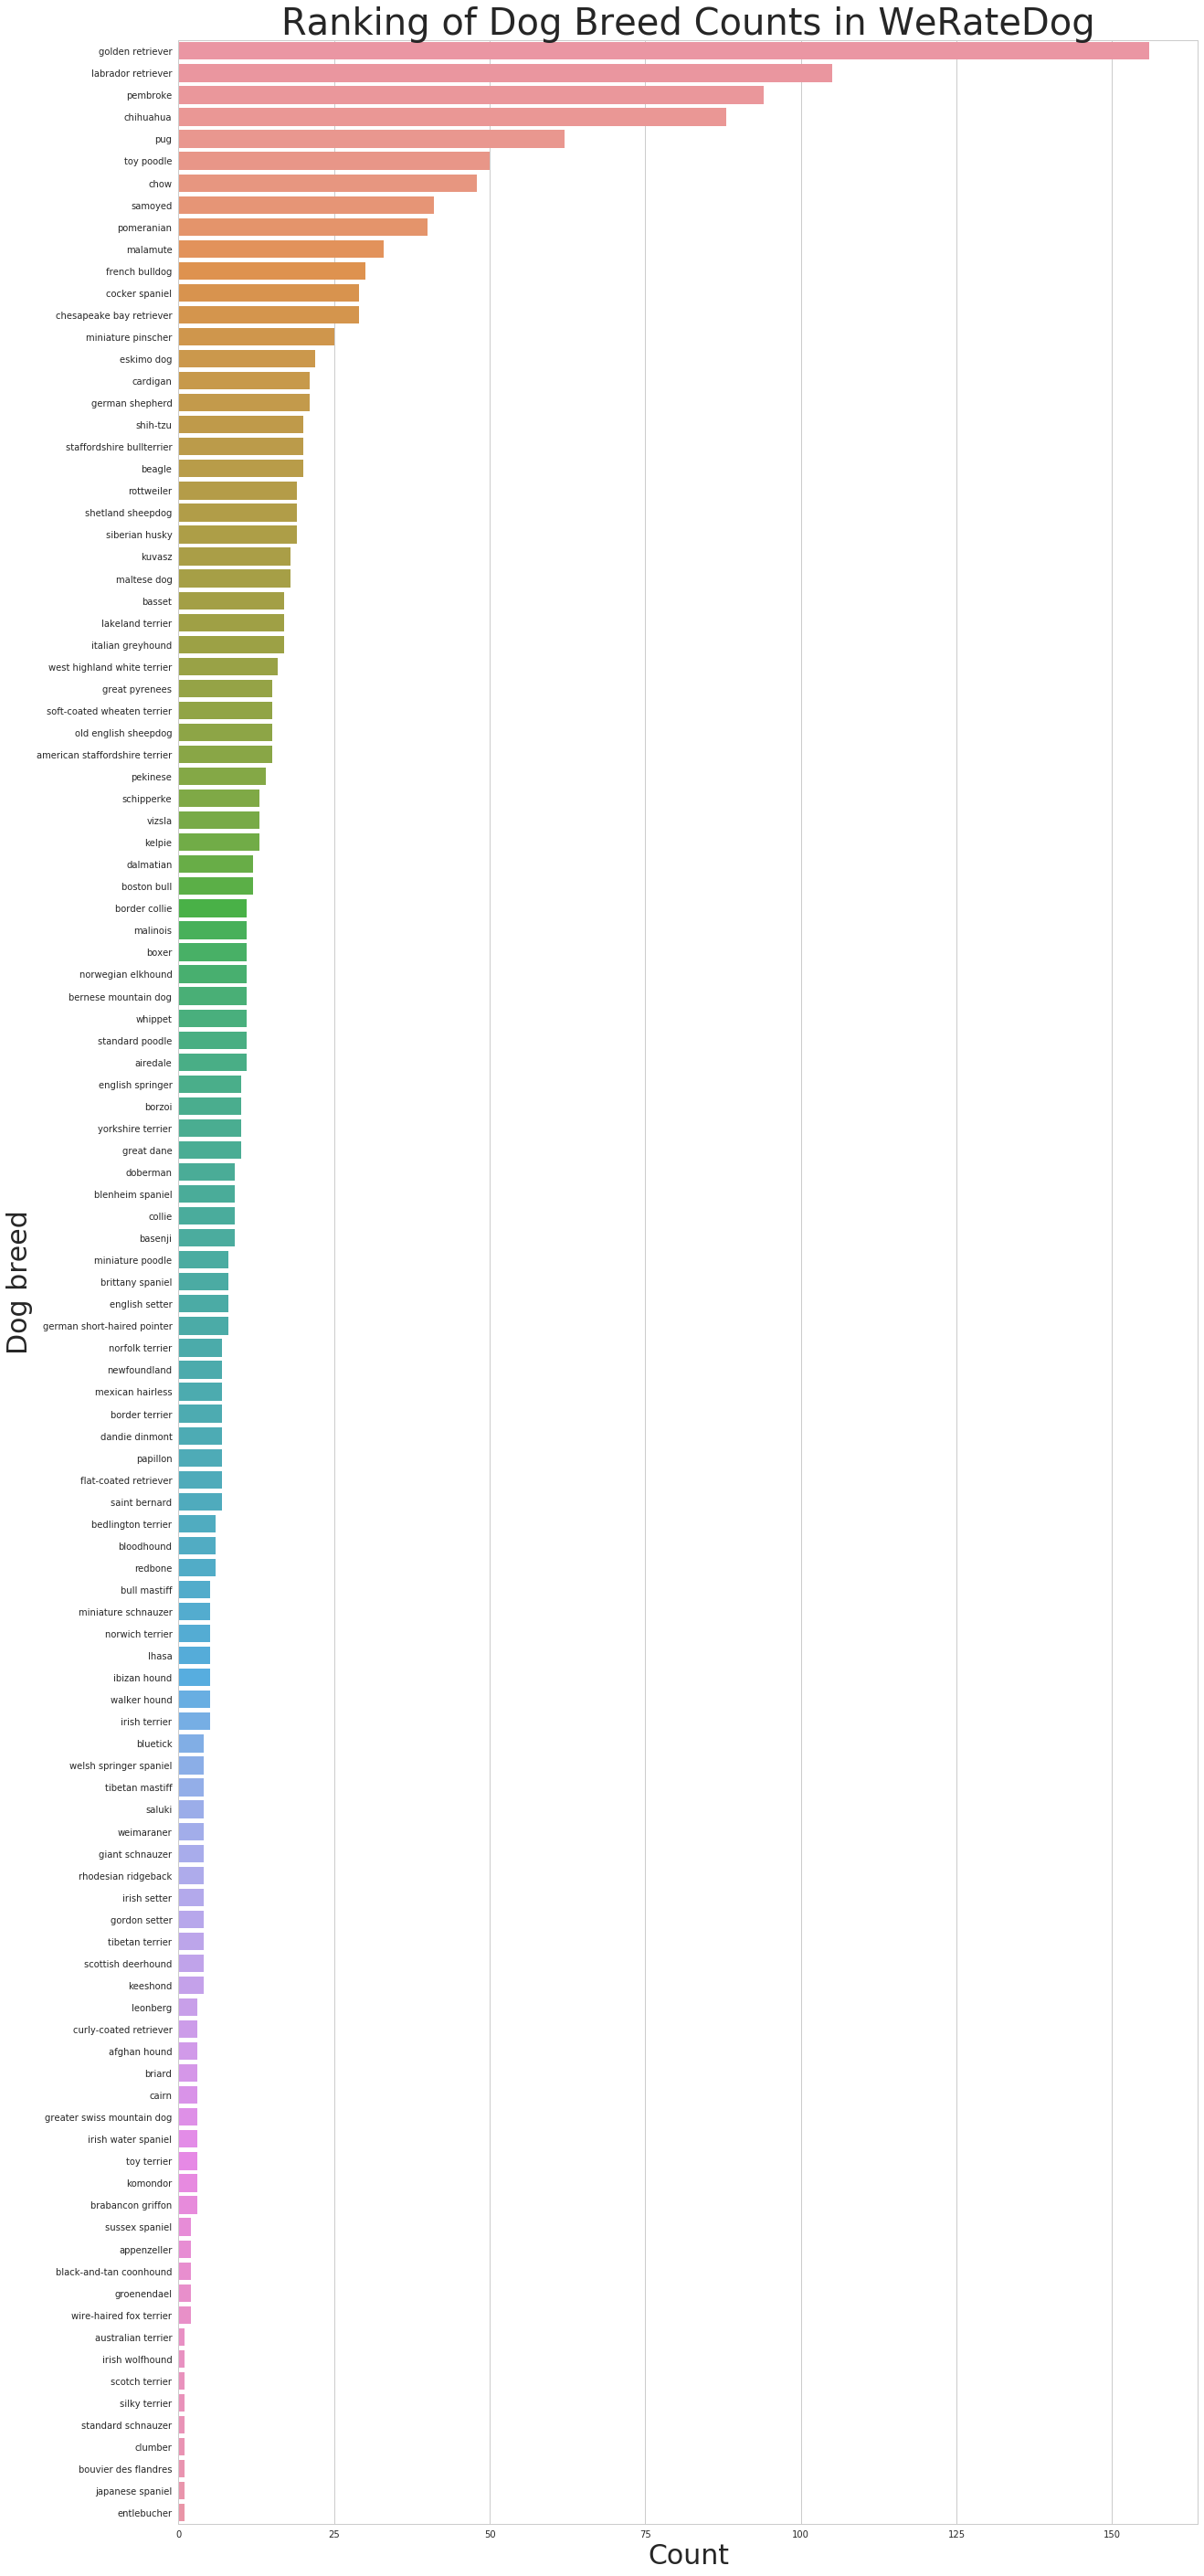

In [117]:
sns.set(style="whitegrid")
plt.subplots(figsize=(20,50))

# make barplot in descending order
sns.barplot(y=df_master['dog_breed'].value_counts().index, x=df_master['dog_breed'].value_counts())

# Set labels
sns.set(font_scale=5) 
plt.legend(loc='upper left', bbox_to_anchor=(0, 2))
plt.xlabel("Count", size=30)
plt.ylabel("Dog breed", size=30)
plt.title("Ranking of Dog Breed Counts in WeRateDog", size=40);

### 4.3. Which dog breed has most favorite counts?

In [85]:
# Find the mean of favorite_count
df_master['favorite_count'].describe()

count      1960.000000
mean       8213.684694
std       12051.583733
min          70.000000
25%        1801.500000
50%        3743.000000
75%       10241.500000
max      153975.000000
Name: favorite_count, dtype: float64

**Average favorite count is 8213**

In [87]:
# Sort the dog breed by favorite count
df_master.groupby(['dog_breed']).mean().favorite_count.sort_values(ascending=False)

dog_breed
bedlington terrier                22835.333333
saluki                            21941.500000
french bulldog                    18530.366667
australian terrier                18143.000000
flat-coated retriever             17284.857143
bouvier des flandres              16250.000000
afghan hound                      15575.333333
black-and-tan coonhound           15461.000000
irish water spaniel               14782.000000
leonberg                          13404.333333
whippet                           13332.272727
english springer                  12829.400000
standard poodle                   12627.454545
cocker spaniel                    12499.620690
samoyed                           12429.634146
border terrier                    12314.571429
mexican hairless                  12278.714286
lakeland terrier                  11903.529412
eskimo dog                        11719.363636
cardigan                          11572.333333
bloodhound                        11290.666667
gol

**Insight 3:** Bedlington terrier, saluki and french bulldog get the most favorite count over all other dog breed.

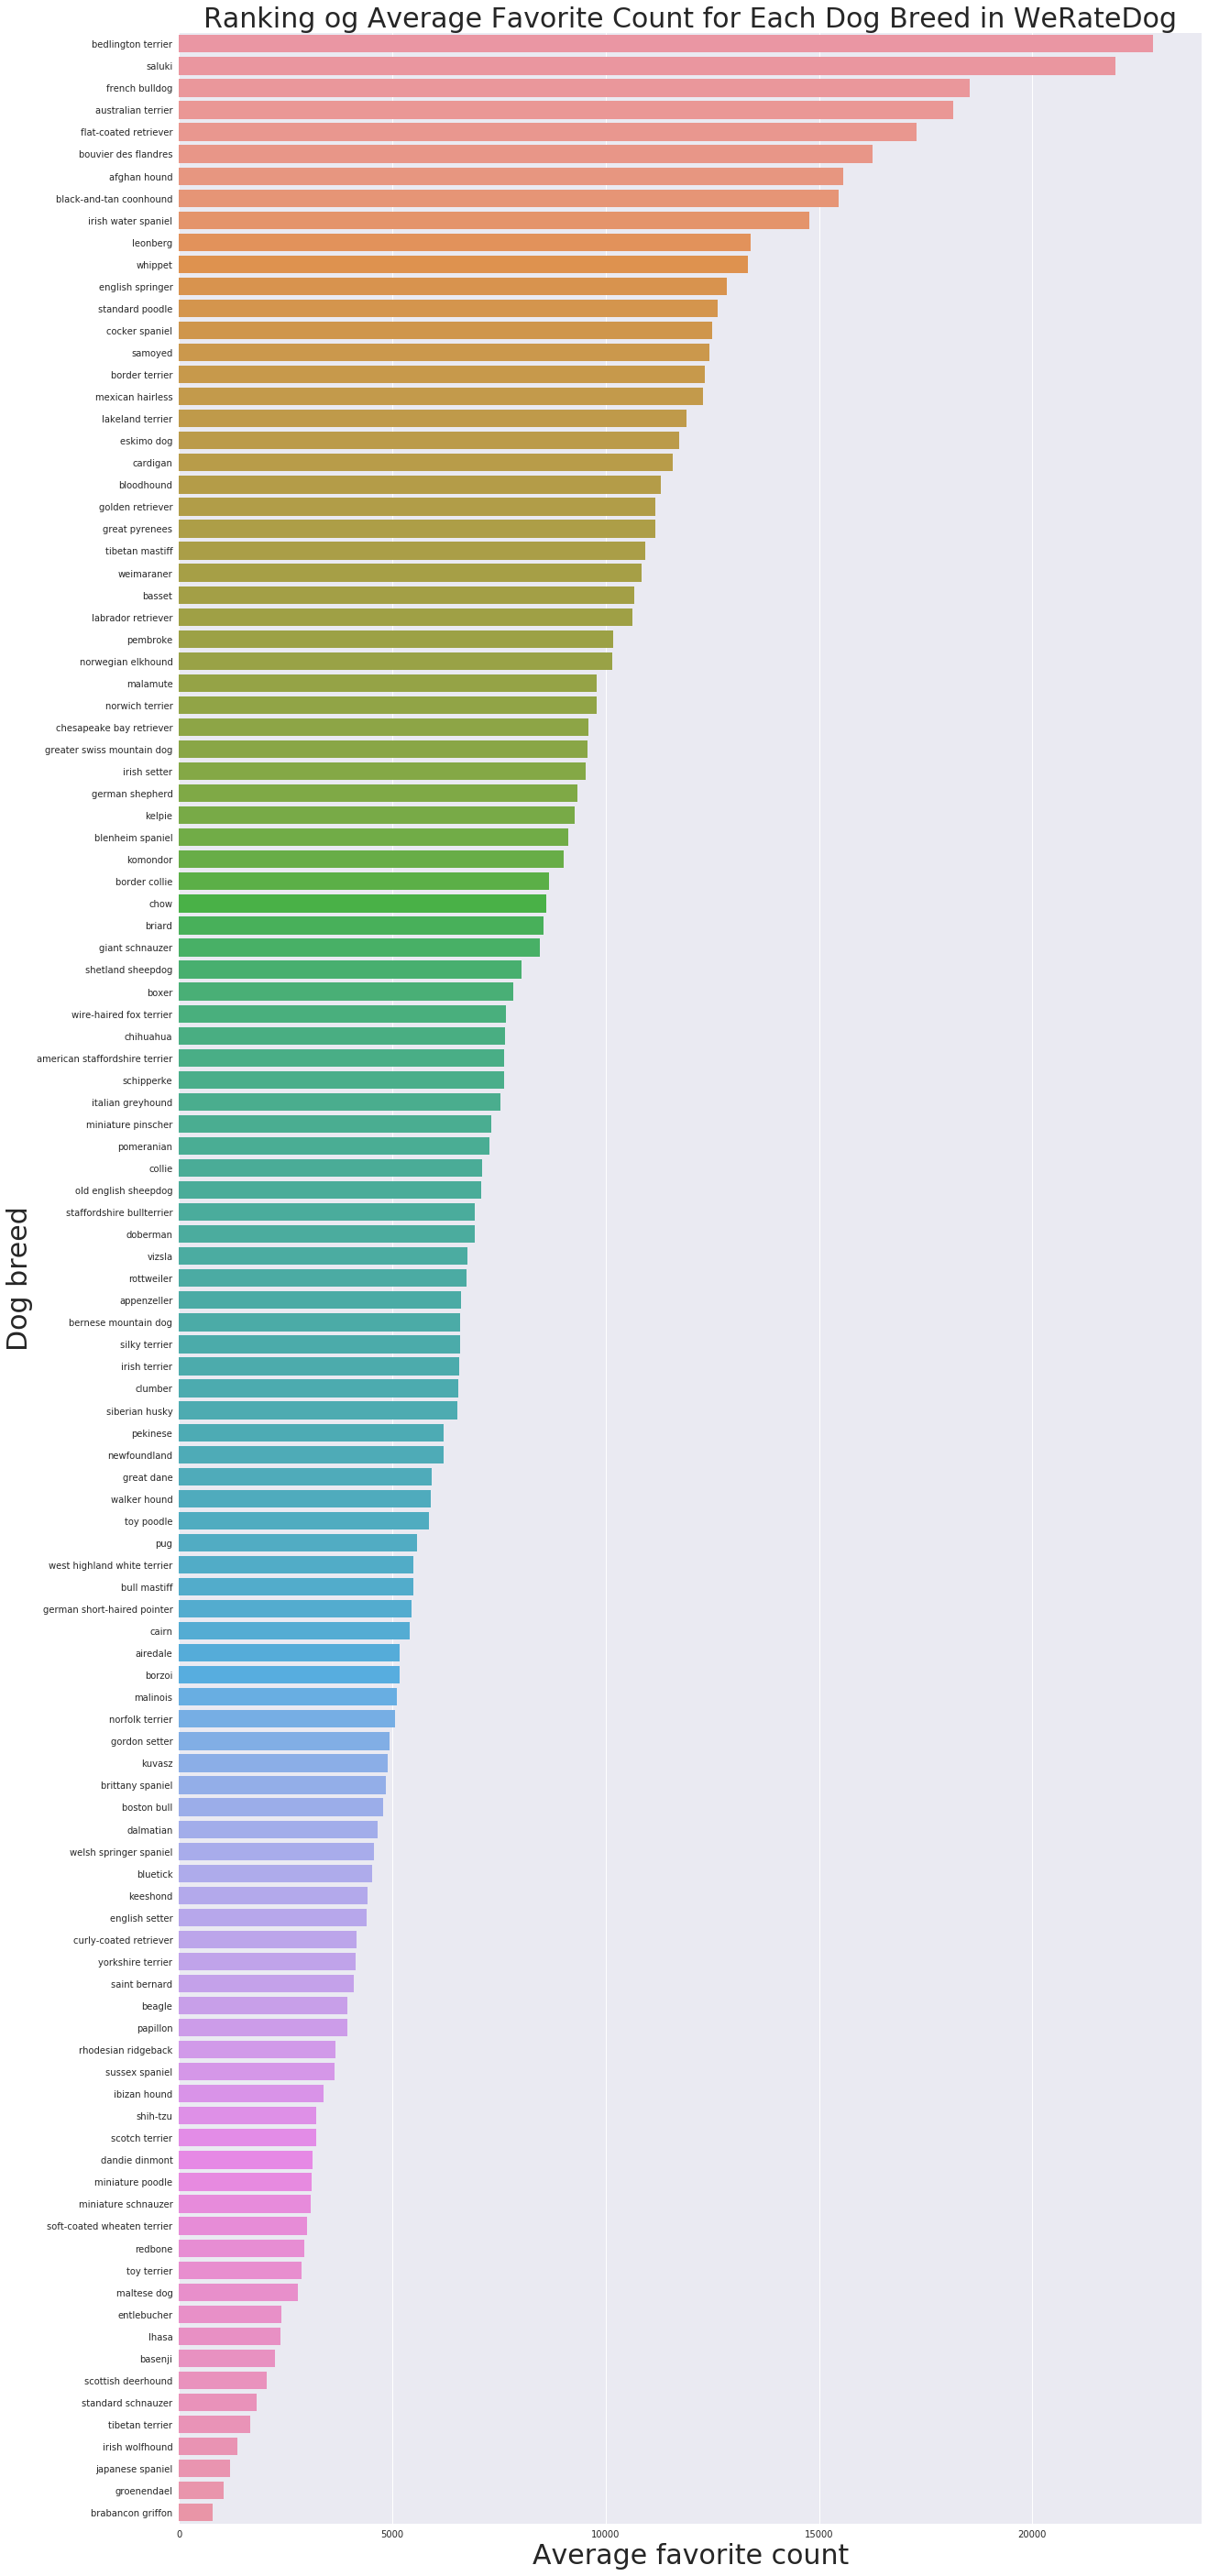

In [122]:
plt.subplots(figsize=(20,50))

# make barplot in descending order
sns.barplot(y=df_master.groupby(['dog_breed']).mean().favorite_count.sort_values(ascending=False).index, 
            x=df_master.groupby(['dog_breed']).mean().favorite_count.sort_values(ascending=False))

# Set labels
#sns.set(font_scale=1) 
#plt.legend(loc='upper left', bbox_to_anchor=(0, 1))
plt.xlabel("Average favorite count", size=30)
plt.ylabel("Dog breed", size=30)
plt.title("Ranking og Average Favorite Count for Each Dog Breed in WeRateDog", size=30);

### 4.4. Which dog breed has most retweet counts?

In [ ]:
# Find the mean of retweet_count
df_master['retweet_count'].describe()

**Average retweet count is 2420**

In [94]:
# List down dog breed with descending retweet_count
df_master.groupby(['dog_breed']).mean().retweet_count.sort_values(ascending=False)

dog_breed
bedlington terrier                7194.000000
afghan hound                      5123.333333
standard poodle                   4787.000000
australian terrier                4772.000000
french bulldog                    4724.933333
english springer                  4704.300000
flat-coated retriever             4471.428571
saluki                            4430.250000
whippet                           4411.818182
cocker spaniel                    4298.068966
eskimo dog                        4163.045455
samoyed                           4076.829268
irish water spaniel               3890.666667
great pyrenees                    3875.266667
bouvier des flandres              3835.000000
lakeland terrier                  3802.588235
mexican hairless                  3671.428571
tibetan mastiff                   3592.250000
black-and-tan coonhound           3565.500000
leonberg                          3324.666667
cardigan                          3262.666667
labrador retriever      

**Insight 4:** bedlington terrier, afghan hound and standard poodle ranked top 3 in terms of number of retweets. 

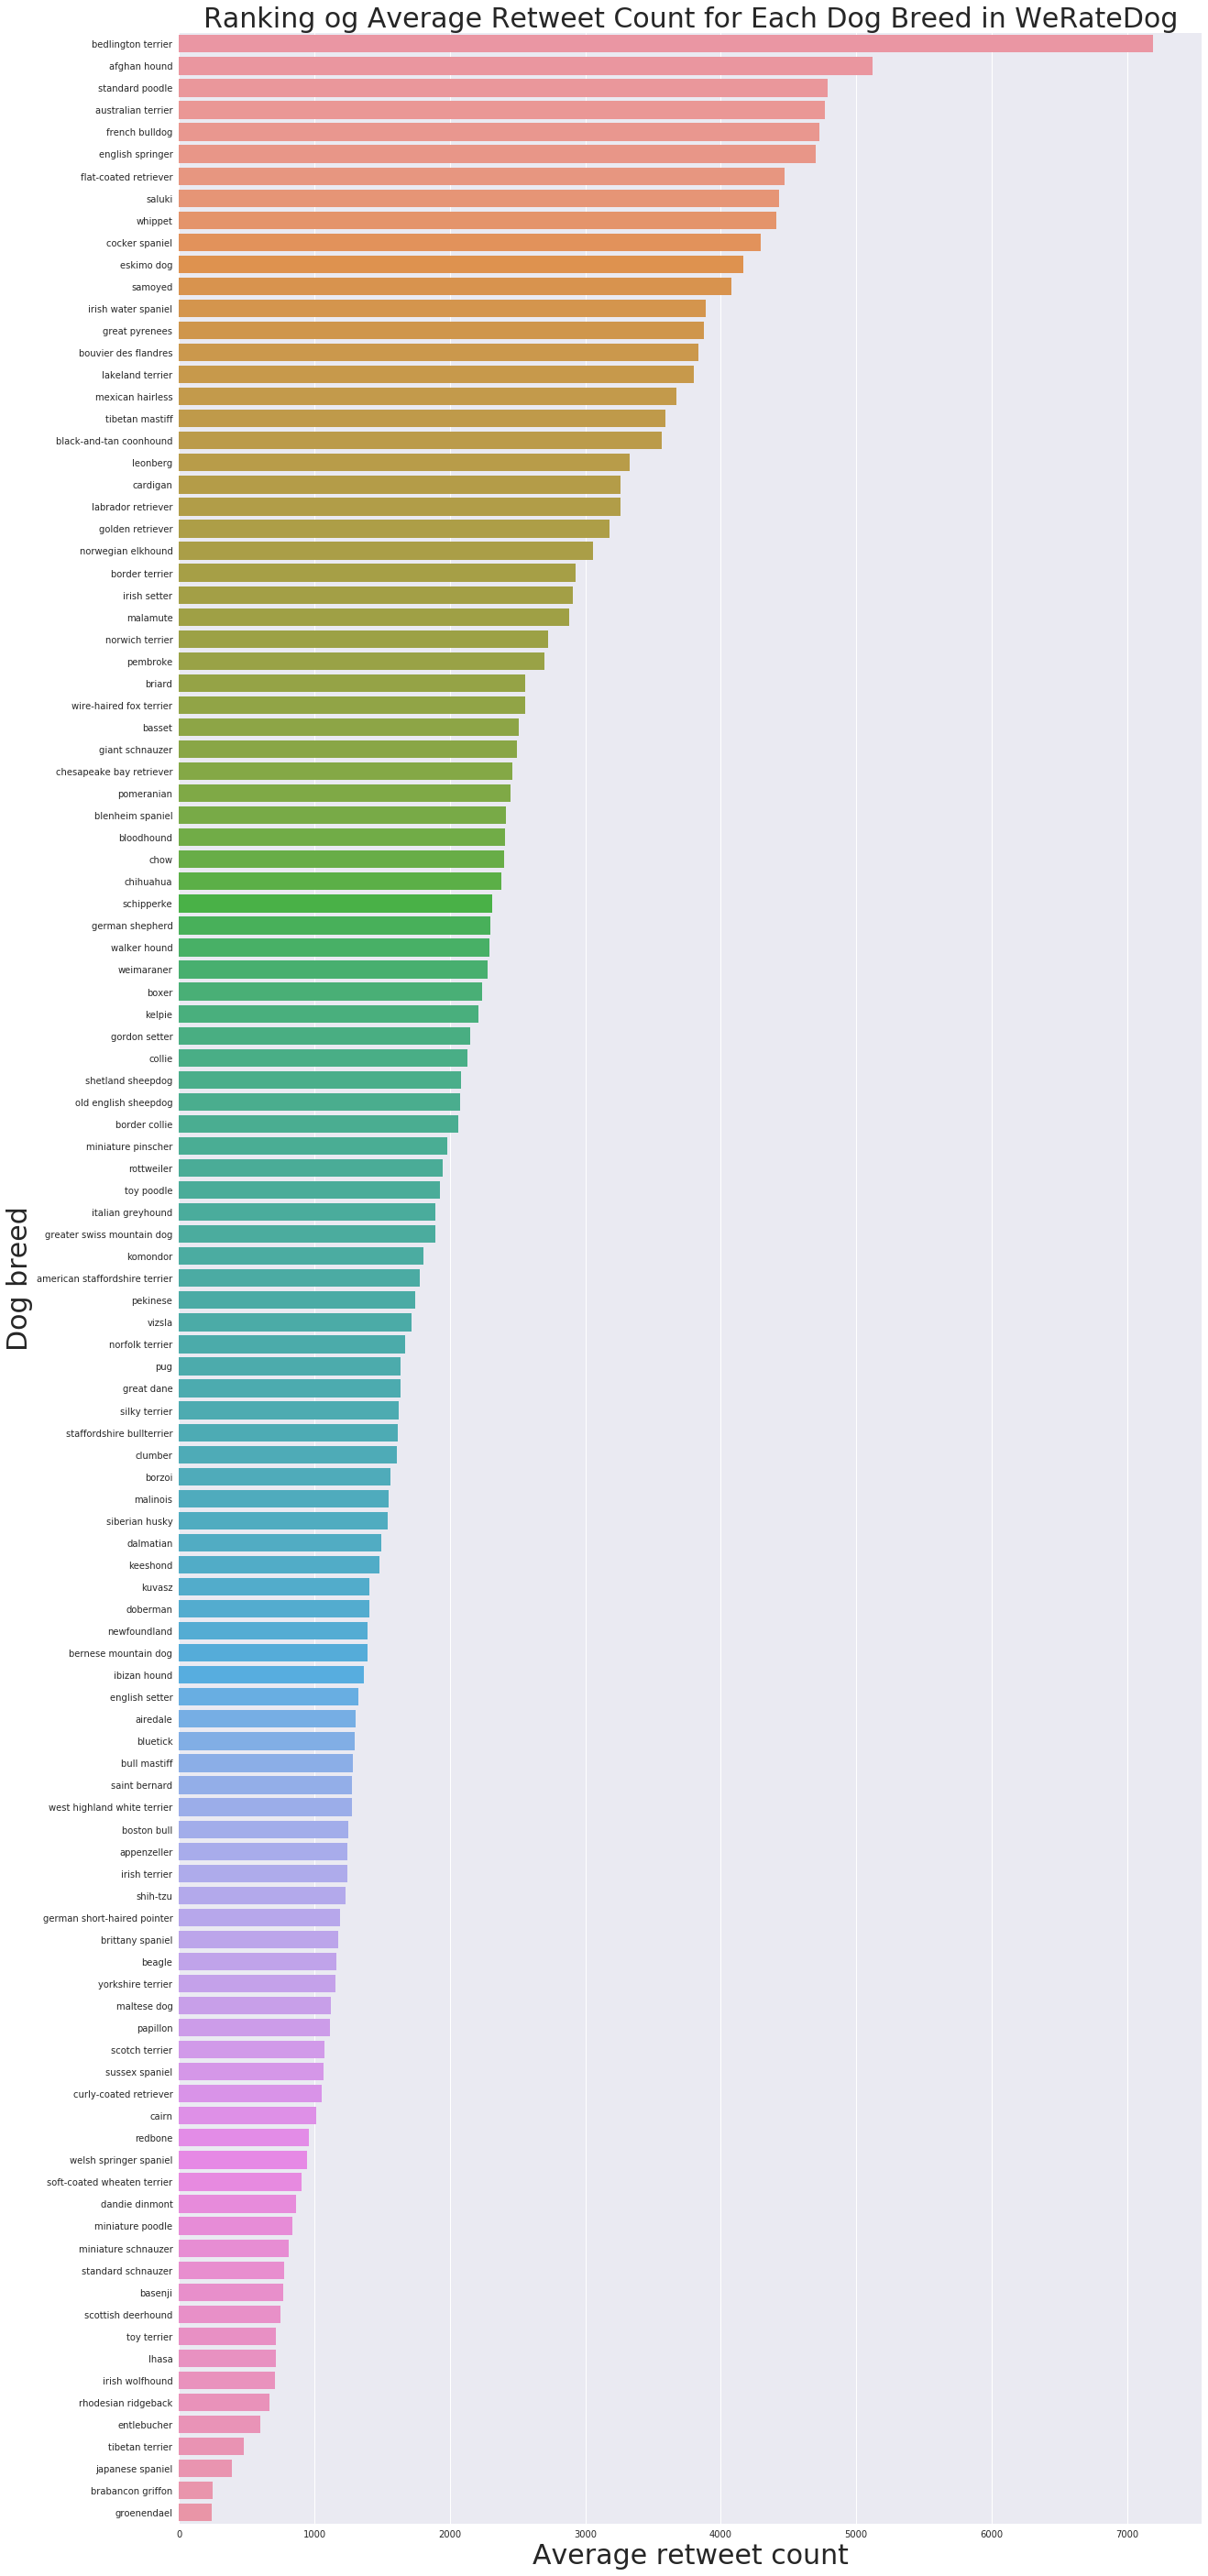

In [123]:
plt.subplots(figsize=(20,50))

# make barplot in descending order
sns.barplot(y=df_master.groupby(['dog_breed']).mean().retweet_count.sort_values(ascending=False).index, 
            x=df_master.groupby(['dog_breed']).mean().retweet_count.sort_values(ascending=False))

# Set labels
sns.set(font_scale=1) 
plt.legend(loc='upper left', bbox_to_anchor=(0, 1))
plt.xlabel("Average retweet count", size=30)
plt.ylabel("Dog breed", size=30)
plt.title("Ranking og Average Retweet Count for Each Dog Breed in WeRateDog", size=30);

## 4.5. Favorite count and reweet count seem positively correlated.

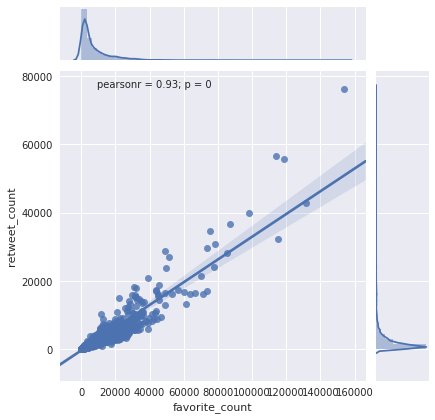

In [112]:
# Use join plot to find relationship between favorite count and reweet count
sns.jointplot(data = df_master, x="favorite_count", y="retweet_count",kind='reg');